In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import data from cleaning
df = pd.read_csv('../data/average_station_traffic.csv')
del df['Unnamed: 0']

In [4]:
# make day/time easier to read
df['Short_Day'] = df.apply(lambda x: x['Day'][:3], axis=1)
df['Short_Time'] = df.apply(
    lambda x: x['Time_Range'][:2] + ' to ' + x['Time_Range'][9:11], axis=1)
df['Short_Time_Range'] = df.apply(
    lambda x: x['Short_Day'] + "  " + x['Short_Time'], axis=1)

In [5]:
# get top stations for each time period
seriesname = df.groupby(['Day', 'Time_Range'])['Total_Traffic'].idxmax()
best_locs_df = df.iloc[seriesname].copy()

In [6]:
# need to create custom order (days of the week are not alphabetical)

# create custom order lists
day_list = ['Sunday', 'Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_range_list = ['00:00 to 04:00', '04:00 to 08:00',
                   '08:00 to 12:00', '12:00 to 16:00',
                   '16:00 to 20:00', '20:00 to 00:00']

# set to categorical variables, order by above list
best_locs_df['Day'] = pd.Categorical(
    best_locs_df['Day'], categories=day_list, ordered=True)
best_locs_df['Time_Range'] = pd.Categorical(
    best_locs_df['Time_Range'], categories=time_range_list, ordered=True)

# reset the indicies & sort
best_locs_df = best_locs_df.sort_values(['Day', 'Time_Range']).reset_index()
best_locs_df = best_locs_df.sort_index()

In [7]:
# get the station names that are best
best_stat_list = best_locs_df.groupby(['STATION']).count().reset_index()
best_stat_list = best_stat_list.STATION.tolist()

In [8]:
# get colors for each station name (has to be <6 unless you use a different palette)
current_palette = sns.color_palette('deep')[:len(best_stat_list)]

In [9]:
# assign those a color to each station
d_st_clr = {}

for i in range(len(best_stat_list)):
    d_st_clr[best_stat_list[i]] = current_palette[i]

In [10]:
# map those colors to the dataframe to be used for plotting
best_locs_df['color'] = best_locs_df["STATION"].map(d_st_clr)

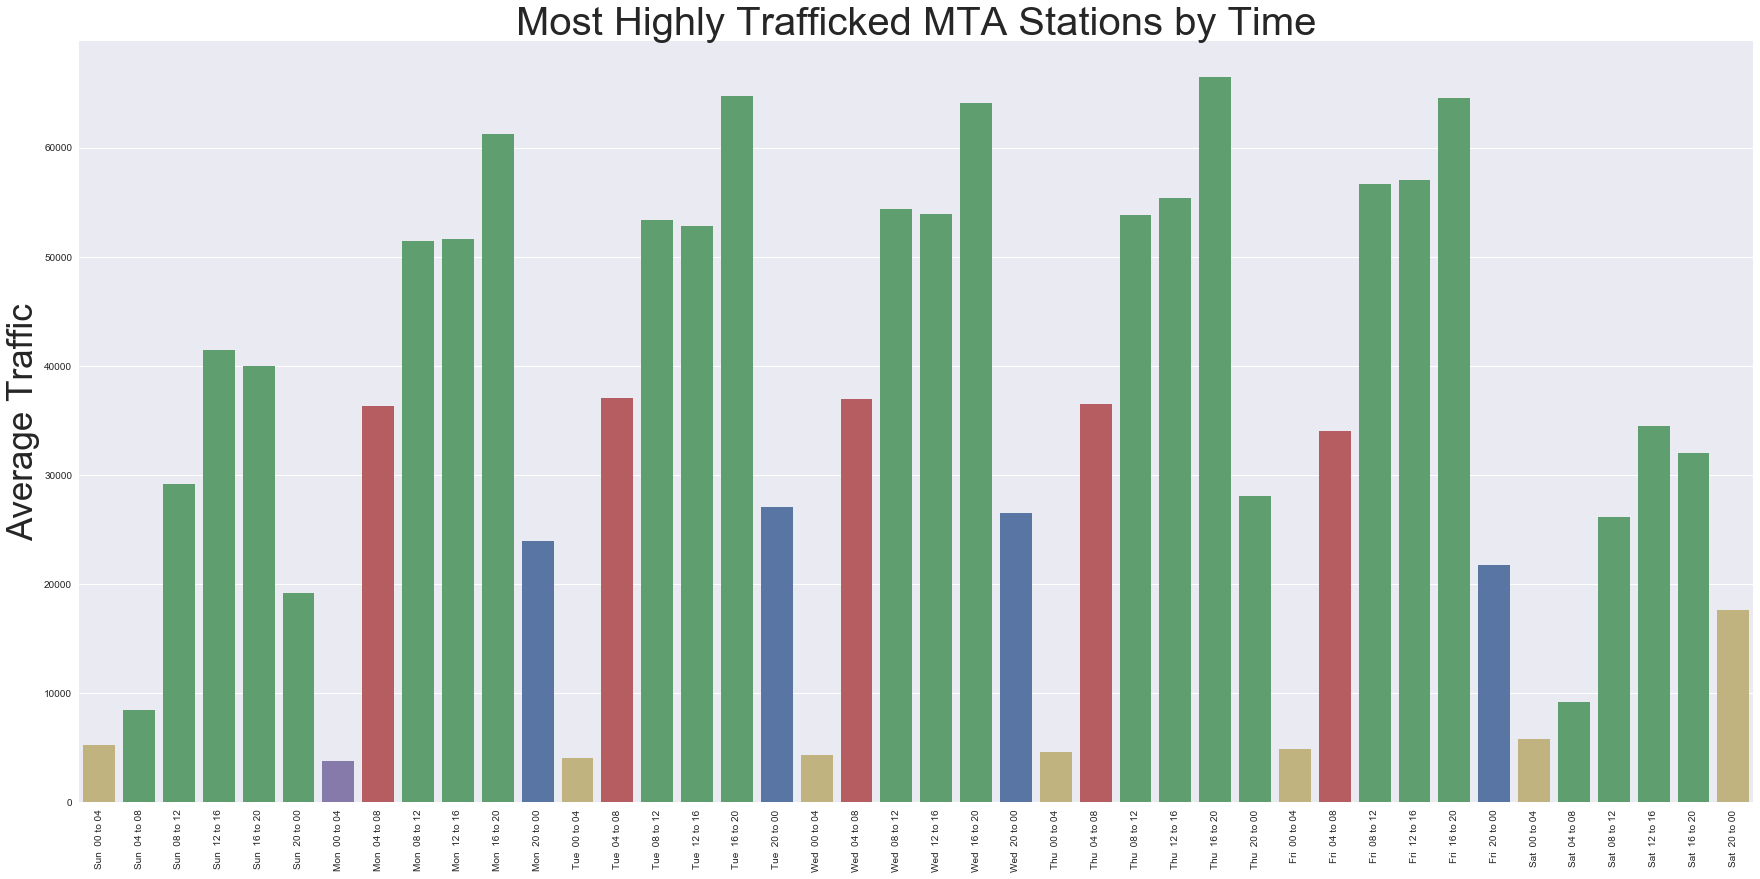

In [11]:
# plot it!
fig, ax = plt.subplots()
fig.set_size_inches(30, 14)
sns.set(font_scale=2)

fig = sns.barplot(x=best_locs_df['Short_Time_Range'],
                  y=best_locs_df['Total_Traffic'],
                  palette=best_locs_df['color'])

fig.set_title("Most Highly Trafficked MTA Stations by Time",
              fontsize=40)
ax.set_xticklabels(best_locs_df['Short_Time_Range'], rotation=90)
ax.set_xlabel('', fontsize=35)
ax.set_ylabel('Average Traffic', fontsize=35)